## Step by step guide to prPlottingFunctions

prPlottingFunctions is a small collection of functions designed to extract values and create plots from a plate reader (pr) object in a robust and standard way. The functions can be categorized as follows:

a) P MEDIA STRAIN functions- functions that return a value given a pr object, a media string and a strain string. 

b) P FUNC MEDIA STRAIN FUNCTIONS. functions that receive an arbitrary function as an input. the output of func is usually a single value. they include a way to relate a given x variable in the data to a y such that y= f(x). 

c)P STAT MEDIA STRAIN FUNCTIONS. these functions operate on a statistic that can be found in the plate reader object in p.d[MEDIA][STRAIN][STAT]. examples are 'FLperod', and 'gr'. for example, statByConcentration plots the given stat for all the concentrations of the media.
    
    example:
    statByConcentrationTimeSlice(p, stat, strain, conc, media, time, col, supress=1, lw=2,labelStrain=1):
    plots the given stat at all concenrations for a specific time slice..

d)REPORT functions: functions that allow to generate a full report of an experiment, which includes many standard plots. These are of two kinds:

    normal: these functions are suitable when dealing with many concentrations of glucose. Before trying to use them for other sugars, I suggest having a chat with me.

    robust: these reports are made to operate under any circumstances for any kind of experiment. usually just need the pr object as an input and other optional formatting arguments. 
    

### About colors

Many plotting functions receive strainColors and  mediaColors as an argument. these are dictionaries of the form colors= {key1: color1, key2: color2...}. if the arguments are set to zero, random colors are generated to be used. 
The functions output the strainColors or mediaColors dictionaries that were used in the function. This is useful because, if random colors were generated, they can be reused in downstream analyses to keep consistency of media and strains. 


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import pickle
%matplotlib inline


In [2]:
cd /Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/platereader 

/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/platereader


In [3]:
import accesspr as ac
import platereader as pr
import prPlottingFunctions as ppf

In [4]:
homedir= '/Users/s1259407'
dropboxPath='/Dropbox/PhD/phd_peter_swain/data/plate_reader_data'

In [5]:
mydir20160212= homedir+dropboxPath+'/20160212_77_hxt1_hxt2_hxt4'

p20160212=pr.platereader(mydir20160212+'/20160212_77_hxt1_hxt2_hxt4.xlsx', mydir20160212+'/20160212contents.xls')



Processing reference strain data for Glu 0.2%


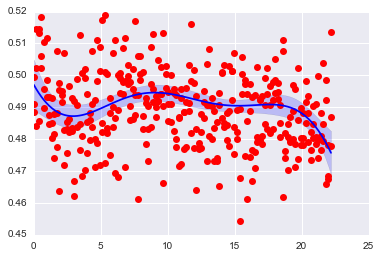

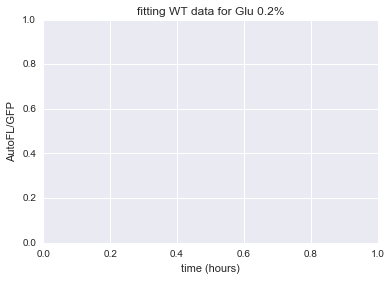

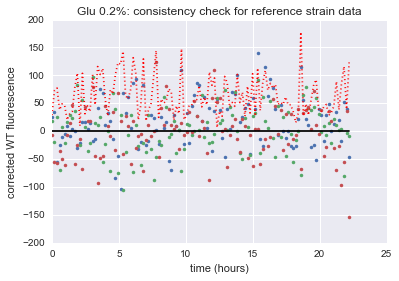

Processing reference strain data for Glu 0.4%


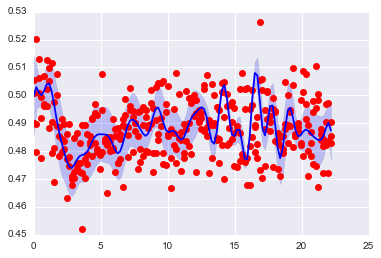

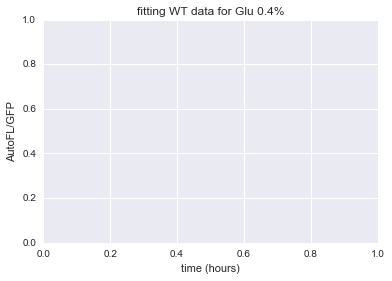

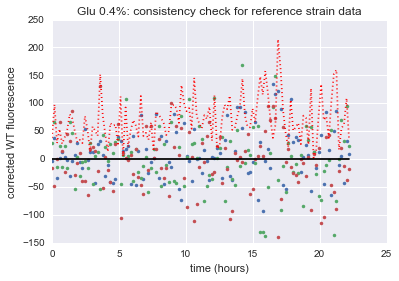

Processing reference strain data for Glu 0.6%


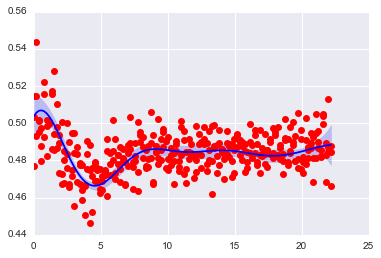

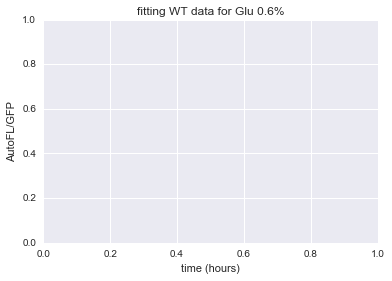

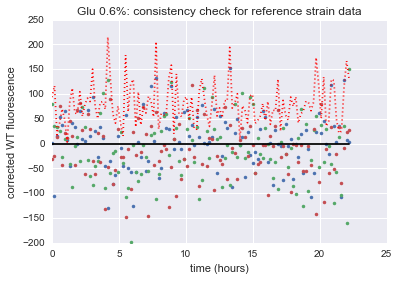

Processing reference strain data for Glu 0.8%


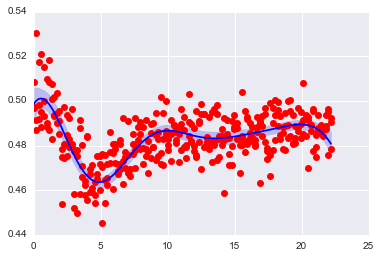

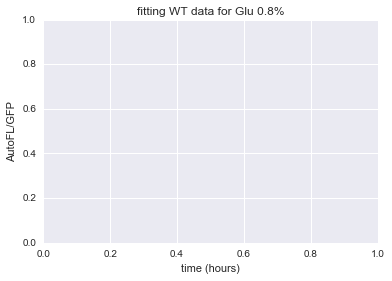

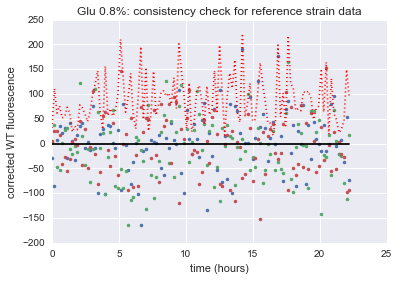

Processing reference strain data for Glu 1%


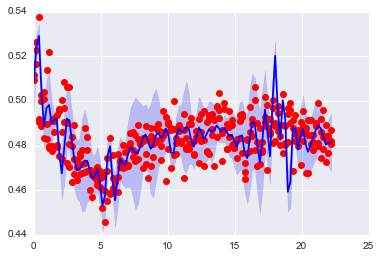

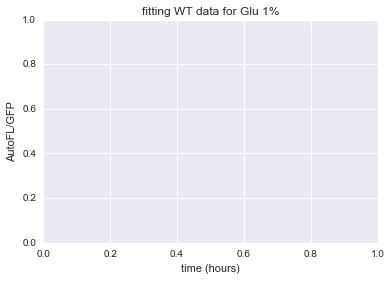

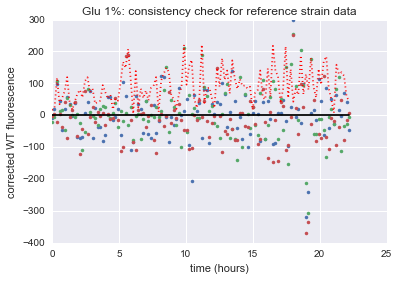

Processing reference strain data for Glu 1.5%


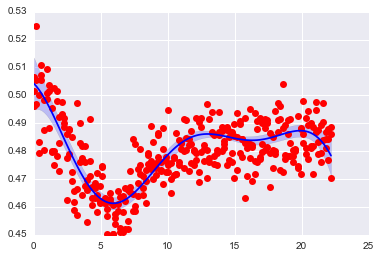

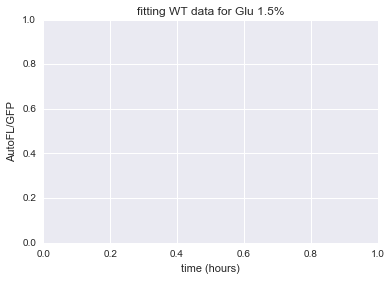

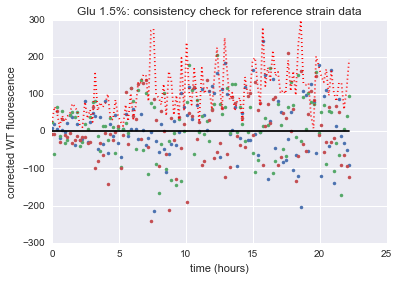

Processing reference strain data for Glu 2%


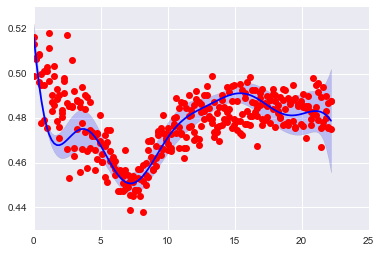

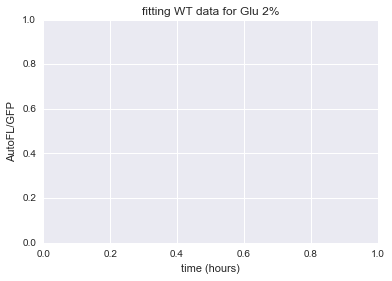

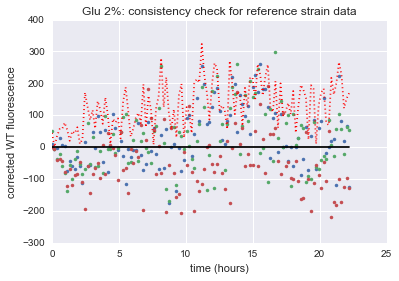

Fitting dilution data for OD correction for non-linearities
Correcting autofluorescence


In [6]:
p20160212.correctauto()

In [7]:
##we run the function and we save the output colors to keep using them thorughout.
strainColors=ppf.plotRawStatPerMediaRobust(p20160212, strainColors=0, dtype='GFP', xlim=False, ylim=False)
ppf.plotRawStatPerMediaRobust(p20160212, strainColors=strainColors, dtype='AutoFL', xlim=False, ylim=False)


TypeError: argument of type 'bool' is not iterable

In [ ]:
##we run the function and we save the output colors to keep using them thorughout.
mediaColors=ppf.plotRawStatPerStrainRobust(p20160212, mediaColors=0, dtype='GFP', xlim=False, ylim=False)



plateReaderFluorescenceReport generates a report of an experiment with multiple concentrations of the same analyte. 

We have to give it an ordered list of the media in increasing order and the actual numerical values of such analyte. 

####  Warning: Do not use this function: not compatible with current plate reader software


In [ ]:
###we use the plotting colors we used above. 
###we want a dose response curve for glucose at 3 hrs, 5 hrs and 7 hrs.
#ppf.plateReaderFluorescenceReport(p20160212, concentrations=['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'],  concvalues=[0.2, 0.4, 0.6, 0.8, 1, 1.5, 2], plotvar=0, plotByMaxOD=1, doseResponseTimes=[3,5,7])


## plateReaderFluorescenceReportRobust 

wraps up all the main functions plotted above such that only the pr object is needed

In [ ]:
ppf.plateReaderFluorescenceReportRobust(p20160212, mediaColors=mediaColors, strainColors=strainColors)


In [ ]:
p20160212.allstrains